<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

**Ответ**
Seed фиксируется для повторяемости экспериментов, чтоб разбиение на трейн-тест было одинаковым и можно было сравнить попытки

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [4]:
# 30 случайных строк
df_train.sample(30, random_state=42)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [5]:
# первые-последние 5 
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [6]:
df_train.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [7]:
# пропуски
missing = df_train.isna().sum()
missing[missing > 0].index.tolist()

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [8]:
# дубликаты
df_train[df_train.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
326,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
6881,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [9]:
df_train = df_train.drop_duplicates(keep="first")
df_train.duplicated().sum()

0

In [10]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_train )
profile.to_file("dataset_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 36.98it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Ответ**
По случайным-первым-последним строчкам можно примерно получить представление о том с каими данными предстоит работать, примерно понять типы данных, получить общую картину, возможно какие-то явные аномалии, предположить какие есть категории.
По ним нельзя получить полную информацию о данных, пропусках, дубликатах, типах данных итп. Нельзя понять среднее, медиану, мин, макс
Просто пример данных для общего представления


Метода duplicated может быть не достаточно в случае близких по значению float величин, в случае частичных дубликатов (в одной из строк одно поле пустое, а остальные совпадают), похожих данных но в другом формате (адрес, или ФИО если в одной колонке в разном порядке)

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [11]:
# ['seats']
median_seats = df_train["seats"].median()
df_train["seats"] = df_train["seats"].fillna(median_seats)
df_test["seats"] = df_test["seats"].fillna(median_seats)

print("NaN в train:", df_train["seats"].isna().sum())
print("NaN в test:", df_test["seats"].isna().sum())

NaN в train: 0
NaN в test: 0


In [12]:
def clean_and_fill_with_median(df_train, df_test, column, check_regex, extract_regex):
    mask = df_train[column].astype(str).str.match(check_regex)
    mask = mask.fillna(False)
    bad_vals = df_train.loc[(~mask) & df_train[column].notna(), column].unique()
    df_train[column] = df_train[column].astype(str).str.extract(extract_regex).astype(float)
    df_test[column]  = df_test[column].astype(str).str.extract(extract_regex).astype(float)
    median_val = df_train[column].median()
    df_train[column] = df_train[column].fillna(median_val)
    df_test[column]  = df_test[column].fillna(median_val)
    print(column, " NaN в train:", {df_train[column].isna().sum()})
    print(column, " NaN в test:", {df_test[column].isna().sum()})
    return df_train, df_test


In [13]:
# ['mileage']
mask = df_train["mileage"].str.match(r"^\d+(\.\d+)?\s?kmpl$")
mask = mask.fillna(False)
df_train.loc[(~mask) & df_train["mileage"].notna(), "mileage"].unique()

C:\Users\dlinnik\AppData\Local\Temp\ipykernel_35812\3926771140.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask = mask.fillna(False)


array(['17.3 km/kg', '33.44 km/kg', '26.2 km/kg', '26.6 km/kg',
       '20.88 km/kg', '30.46 km/kg', '21.94 km/kg', '13.45 km/kg',
       '32.52 km/kg', '11.88 km/kg', '26.3 km/kg', '23.7 km/kg',
       '19.2 km/kg', '17.8 km/kg', '10.9 km/kg', '13.2 km/kg',
       '21.4 km/kg', '16.6 km/kg', '16.0 km/kg', '22.8 km/kg',
       '33.0 km/kg', '19.0 km/kg', '14.4 km/kg', '26.83 km/kg',
       '15.1 km/kg'], dtype=object)

In [14]:
df_train, df_test = clean_and_fill_with_median(df_train, df_test, column="mileage", check_regex=r"^\d+(\.\d+)?\s?kmpl$", extract_regex=r"([\d\.]+)")

mileage  NaN в train: {0}
mileage  NaN в test: {0}


In [15]:
# ['engine']
df_train, df_test = clean_and_fill_with_median(df_train, df_test, column="engine", check_regex=r"^\d+ CC$", extract_regex=r"([\d\.]+)")

engine  NaN в train: {0}
engine  NaN в test: {0}


In [16]:
# ['max_power']

df_train, df_test = clean_and_fill_with_median(df_train, df_test, column="max_power", check_regex=r"^\d+(\.\d+)? bhp$", extract_regex=r"([\d\.]+)")

max_power  NaN в train: {0}
max_power  NaN в test: {0}


### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [17]:
# your code here
X = df_train.drop(columns=["selling_price"])

X[X.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.10,1197.0,85.80,114Nm@ 4000rpm,5.0
370,BMW X4 M Sport X xDrive20d,2019,7500,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190.00,400Nm@ 1750-2500rpm,5.0
444,Maruti Alto 800 VXI,2016,50000,Petrol,Individual,Manual,First Owner,22.74,796.0,47.30,69Nm@ 3500rpm,5.0
766,Chevrolet Beat Diesel LT,2012,70000,Diesel,Individual,Manual,Second Owner,25.44,936.0,57.60,150Nm@ 1750rpm,5.0
1000,Maruti Alto LXI,2005,40000,Petrol,Individual,Manual,Second Owner,19.70,796.0,46.30,62Nm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6815,Datsun RediGO T Option,2016,35000,Petrol,Individual,Manual,First Owner,22.70,799.0,53.64,72Nm@ 4386rpm,5.0
6891,Maruti Alto 800 LXI,2017,35000,Petrol,Individual,Manual,First Owner,24.70,796.0,47.30,69Nm@ 3500rpm,5.0
6906,Maruti Swift VDI,2012,90000,Diesel,Individual,Manual,Second Owner,22.90,1248.0,74.00,190Nm@ 2000rpm,5.0
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.00,995.0,62.00,90.3Nm@ 4200rpm,5.0


In [18]:
df_train = df_train.drop_duplicates(subset=X.columns, keep="first")
df_train = df_train.reset_index(drop=True)

In [19]:
df_train.shape

(5840, 13)

In [20]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [21]:
cols = ["mileage", "engine", "max_power"]

df_train[cols].dtypes

mileage      float64
engine       float64
max_power    float64
dtype: object

In [22]:
df_train = df_train.drop(columns=["torque"])
df_train.shape

(5840, 12)

In [23]:
df_test = df_test.drop(columns=["torque"])
df_test.shape

(1000, 12)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [24]:
df_train[["engine", "seats"]].dtypes

engine    float64
seats     float64
dtype: object

In [25]:
df_train["engine"] = df_train["engine"].astype(int)
df_train["seats"] = df_train["seats"].astype(int)


In [26]:
df_test["engine"] = df_test["engine"].astype(int)
df_test["seats"] = df_test["seats"].astype(int)


In [27]:
df_train[["engine", "seats"]].dtypes

engine    int32
seats     int32
dtype: object

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [28]:
display(df_train.describe())

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.433070,1429.448973,87.905426,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.985958,485.662834,31.640599,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.440000,1248.000000,81.830000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [29]:
display(df_test.describe())

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.340140,1454.87600,90.841100,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951772,521.99574,34.893536,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.400000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


In [30]:
display(df_train.describe(include=["object"]))

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [31]:
display(df_test.describe(include=["object"]))

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [32]:
 df_train.shape

(5840, 12)

In [33]:
# adjusted assert, since we removed "torque" col after previous assert. That one was 5840, 13. This one should be 5840, 12
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [34]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

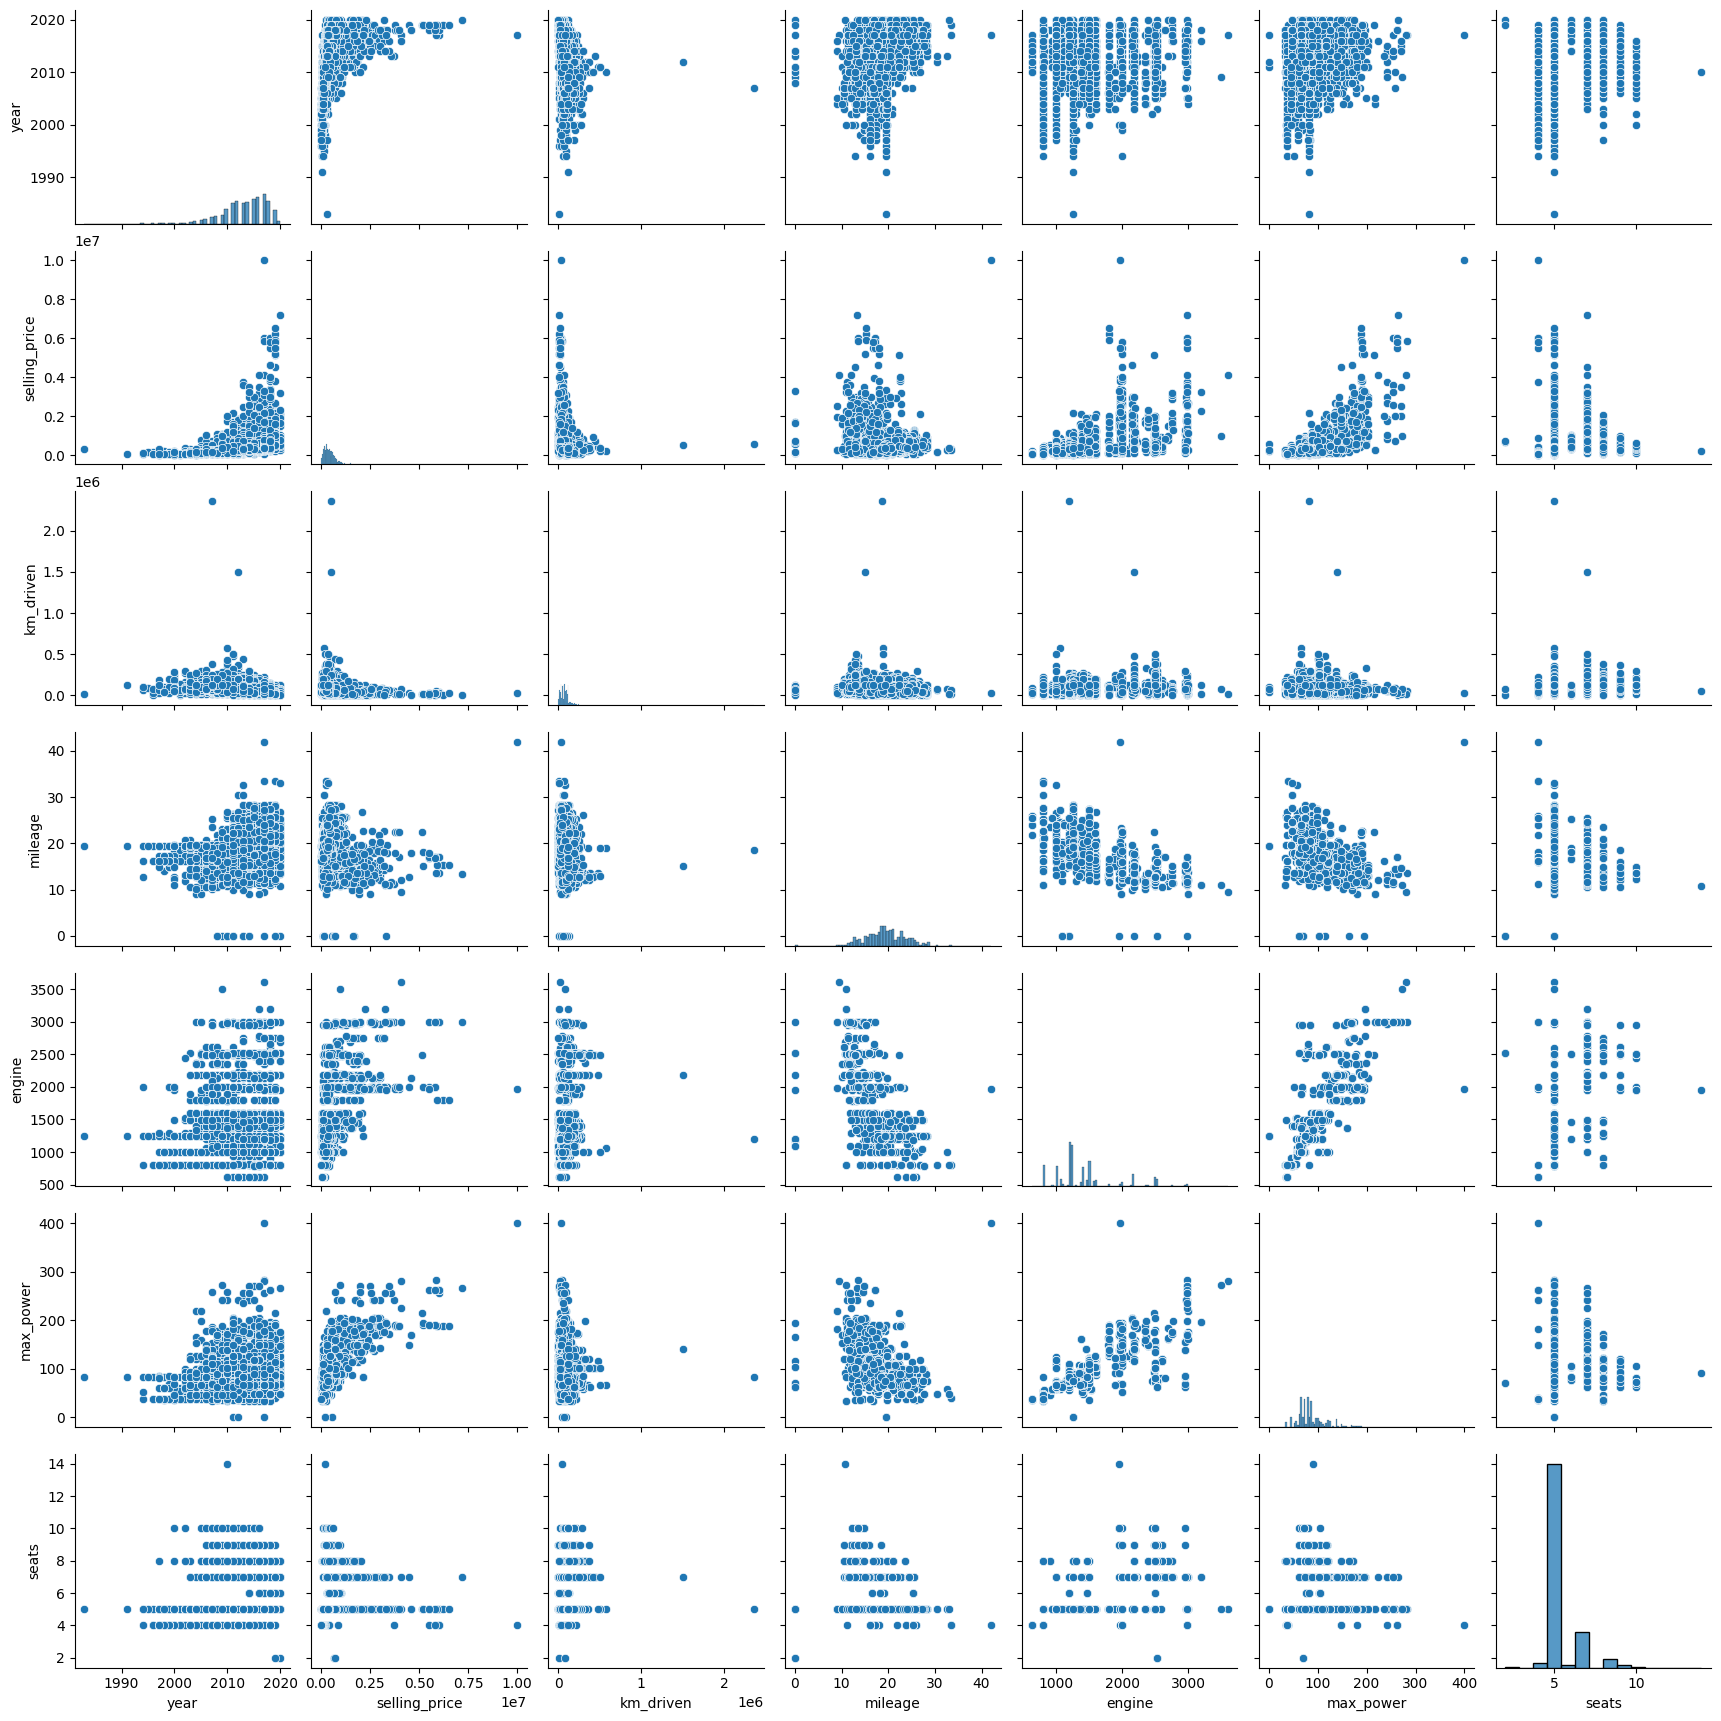

In [35]:
sns.pairplot(df_train)
plt.show()

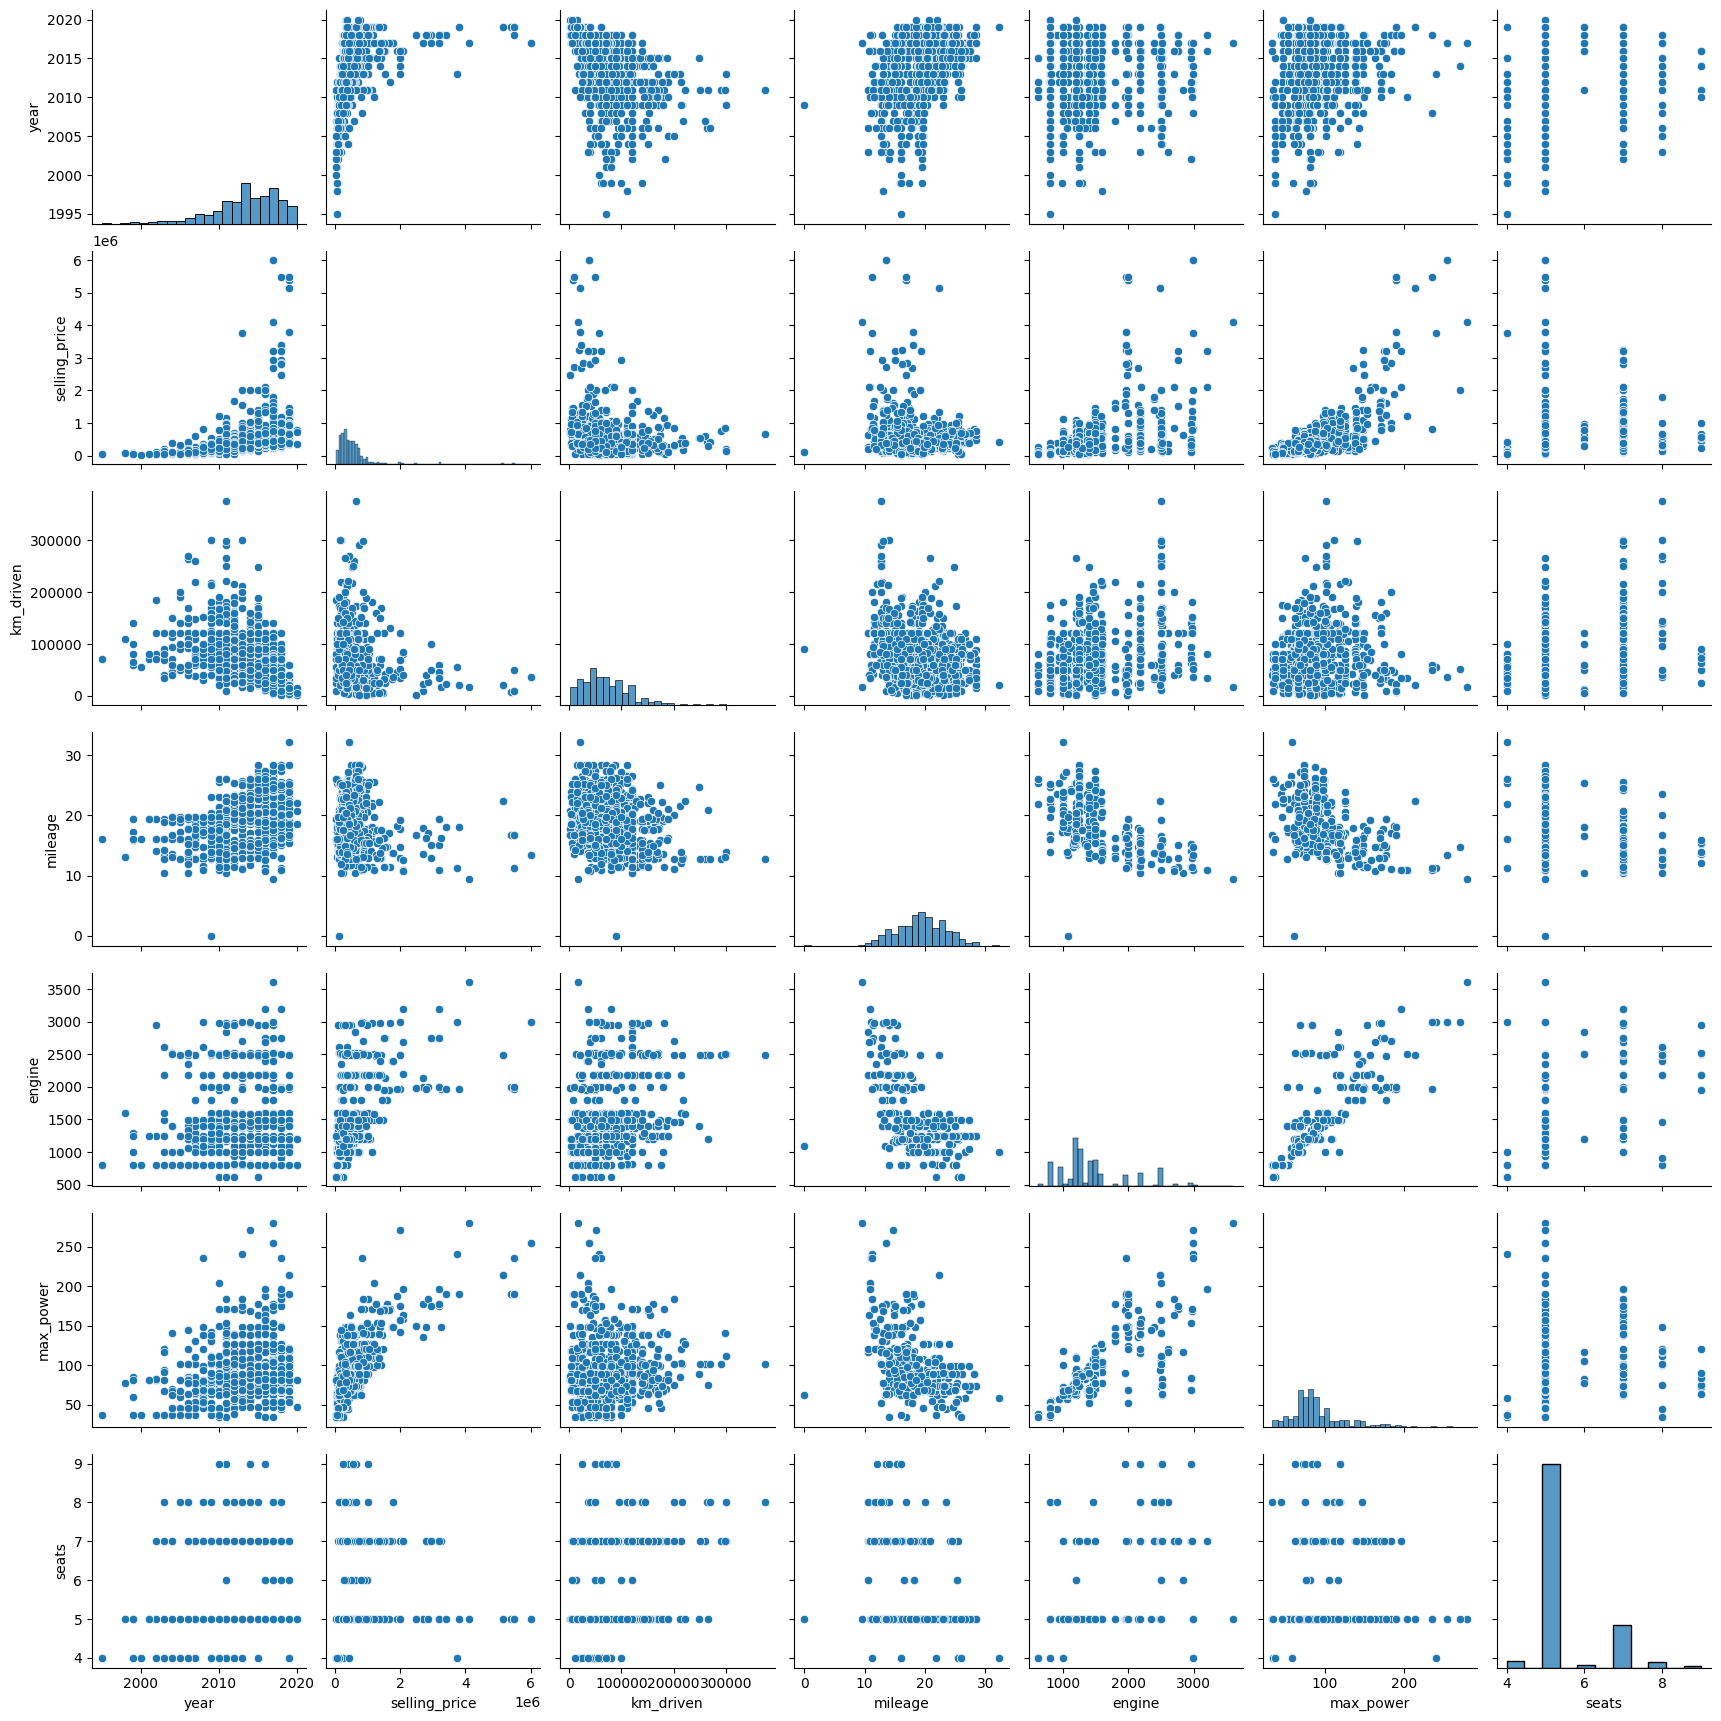

In [36]:
sns.pairplot(df_test)
plt.show()

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [38]:
import pickle
numeric_cols = df_train.select_dtypes(include='number')

corr_matrix = numeric_cols.corr(method="pearson")
with open('corr_matrix.pkl', 'wb') as f:
    pickle.dump(corr_matrix, f)
    
corr_matrix

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.340493,0.002819,0.156904,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.105080,0.447672,0.692827,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.181925,0.229766,0.024579,0.192328
mileage,0.340493,-0.105080,-0.181925,1.000000,-0.573105,-0.373520,-0.451304
engine,0.002819,0.447672,0.229766,-0.573105,1.000000,0.681124,0.652172
max_power,0.156904,0.692827,0.024579,-0.373520,0.681124,1.000000,0.244123
seats,0.041178,0.149953,0.192328,-0.451304,0.652172,0.244123,1.000000


In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

наиименьшая корреляция - Год и объем двигателя. 
сильная положительная линейная зависимость между selling_price-max_power и max_power - engine
есть средняя связь между year и km_driven, коэф -0.37, то есть чем меньше год, тем больше проехала машина. Но это менее сильная связь чем между max_power и engine

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

In [41]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [46]:
y_train = df_train["selling_price"]
X_train = df_train.select_dtypes(include='number').drop(columns=["selling_price"])

df_train.to_csv("df_train.csv", index=False)
df_test.to_csv("df_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
df_train.drop(columns=["selling_price"]).to_csv("X_train.csv", index=False)

In [43]:
X_train.head(5)

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5


In [49]:
y_test = df_test["selling_price"]
X_test = df_test.select_dtypes(include='number').drop(columns=["selling_price"])

print(df_train['seller_type'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']


### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

In [116]:
# function to apply model and print results
def apply_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mse_train = MSE(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    print(name, ": Train:", "MSE =", mse_train, "R2 =", r2_train)
    
    mse_test = MSE(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    print(name, ": Test:", "MSE =", mse_test, "R2 =", r2_test)
        
    return y_pred_test

In [126]:
# function to serialize model
def serialize_model(artifacts, filename): 
    with open(filename, "wb") as f:
        pickle.dump(artifacts, f)

In [127]:
y_pred_test_linreg_def = apply_model("Linear Regression Default", LinearRegression(), X_train, y_train, X_test, y_test)

Linear Regression Default : Train: MSE = 116873522067.38211 R2 = 0.5922613746055911
Linear Regression Default : Test: MSE = 233298943864.99548 R2 = 0.5941416939423312


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [128]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [156]:
model = LinearRegression()
y_pred_test_linreg_scaled = apply_model("Linear Regression Scaled", model, X_train_scaled, y_train, X_test_scaled, y_test)

artifacts = {
    "model": model,
    "scaler": scaler
}

serialize_model(artifacts, "lin_reg_scaled.pkl")

Linear Regression Scaled : Train: MSE = 116873522067.38176 R2 = 0.5922613746055925
Linear Regression Scaled : Test: MSE = 233298943864.98907 R2 = 0.5941416939423423


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [157]:
for name, coef in zip(X_train.columns, model.coef_):
    print(f"{name}: {coef:.4f}")

year: 152769.5238
km_driven: -44160.9123
mileage: 28866.5113
engine: 61194.0674
max_power: 322810.6242
seats: -23201.3757


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [158]:
model = Lasso()
y_pred_test_lasso_def = apply_model("Lasso Default", model, X_train_scaled, y_train, X_test_scaled, y_test)

artifacts = {
    "model": model,
    "scaler": scaler
}
serialize_model(artifacts, "lasso_def.pkl")

Lasso Default : Train: MSE = 116873522077.49564 R2 = 0.592261374570308
Lasso Default : Test: MSE = 233299614653.79535 R2 = 0.5941405270051752


In [159]:
for name, coef in zip(X_train.columns, model.coef_):
    print(f"{name}: {coef:.4f}")

year: 152769.3412
km_driven: -44159.7840
mileage: 28864.6290
engine: 61189.2353
max_power: 322811.5082
seats: -23198.4992


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [160]:
grid = GridSearchCV(estimator = Lasso(), param_grid = {"alpha": np.logspace(-4, 4, 10)}, cv = 10, scoring = "r2")
grid.fit(X_train_scaled, y_train)

print("best_params_: ", grid.best_params_)
print("best_score_: ", grid.best_score_)
print("best_estimator_.coef_:", grid.best_estimator_.coef_)

best_params_:  {'alpha': 10000.0}
best_score_:  0.5727198513372198
best_estimator_.coef_: [151792.24602459 -32738.51182333   9314.09139258  17854.2448235
 329235.82198429     -0.        ]


In [161]:
model = Lasso(alpha=10000)
y_pred_test_lasso_best = apply_model("Lasso Best", model, X_train_scaled, y_train, X_test_scaled, y_test)

artifacts = {
    "model": model,
    "scaler": scaler
}
serialize_model(artifacts, "lasso_best.pkl")

Lasso Best : Train: MSE = 117736025971.07419 R2 = 0.5892523427062533
Lasso Best : Test: MSE = 240510972831.9918 R2 = 0.5815952939831536


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [162]:
grid = GridSearchCV(estimator = ElasticNet(), param_grid = {"alpha": np.logspace(-4, 4, 9)}, cv = 10, scoring = "r2")
grid.fit(X_train_scaled, y_train)

print("best_params_: ", grid.best_params_)
print("best_score_: ", grid.best_score_)
print("best_estimator_.coef_:", grid.best_estimator_.coef_)

best_params_:  {'alpha': 0.1}
best_score_:  0.573568084373669
best_estimator_.coef_: [149586.31186057 -45443.16601433  25722.17342286  73134.78192268
 299518.97296778 -25089.58554932]


In [163]:
model = ElasticNet(alpha=0.1)
y_pred_test_elastic = apply_model("ElasticNet Best", model, X_train_scaled, y_train, X_test_scaled, y_test)

artifacts = {
    "model": model,
    "scaler": scaler
}
serialize_model(artifacts, "elastic_net.pkl")

ElasticNet Best : Train: MSE = 117201243294.93001 R2 = 0.5911180480379542
ElasticNet Best : Test: MSE = 239624248813.7191 R2 = 0.5831378826551583


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [164]:
y_train_cat = df_train["selling_price"]
X_train_cat = df_train.drop(columns=["selling_price", "name"])
X_train_cat.head(5)

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5


In [165]:
y_test_cat = df_test["selling_price"]
X_test_cat = df_test.drop(columns=["selling_price", "name"])
X_test_cat.head(5)

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2010,168000,Diesel,Individual,Manual,First Owner,14.0,2498,112.0,7
1,2017,25000,Diesel,Individual,Manual,First Owner,21.5,1497,108.5,5
2,2007,218463,Petrol,Individual,Automatic,First Owner,12.9,1799,130.0,5
3,2015,173000,Diesel,Individual,Manual,First Owner,25.1,1498,98.6,5
4,2011,70000,Petrol,Individual,Manual,Second Owner,16.5,1172,65.0,5


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [166]:
assert X_train_cat.shape == (5840, 10)

In [167]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [168]:
cat_cols = X_train_cat.select_dtypes(include=["object"]).columns.tolist()
cat_cols.append("seats")

X_train_ohe = pd.get_dummies(X_train_cat, columns=cat_cols, drop_first=True)
X_test_ohe = pd.get_dummies(X_test_cat, columns=cat_cols, drop_first=True)

X_train_ohe, X_test_ohe = X_train_ohe.align(X_test_ohe, join="left", axis=1, fill_value=0)

X_train_ohe.head(5)


,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,23.40,1248,74.00,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
1,2014,120000,21.14,1498,103.52,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,2010,127000,23.00,1396,90.00,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,2007,120000,16.10,1298,88.20,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
4,2017,45000,20.14,1197,81.86,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False


In [169]:
scaler = StandardScaler()

X_train_ohe_scaled = scaler.fit_transform(X_train_ohe)
X_test_ohe_scaled = scaler.transform(X_test_ohe)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [170]:
grid = GridSearchCV(estimator = Ridge(), param_grid = {"alpha": np.logspace(-4, 4, 20)}, cv = 10, scoring = "r2")
grid.fit(X_train_ohe_scaled, y_train)

print("best_params_: ", grid.best_params_)
print("best_score_: ", grid.best_score_)
print("best_estimator_.coef_:", grid.best_estimator_.coef_)

best_params_:  {'alpha': 545.5594781168514}
best_score_:  0.6217299710170301
best_estimator_.coef_: [136948.95679297 -33896.97901349  25165.00772242  57944.71277025
 242459.4882809   18513.95584043   8883.30630289 -16489.21267848
 -33638.71165738  -6960.6875764  -85872.63451665  -8413.26290939
 -27092.52869155  80964.05390922 -13578.74478829  60140.05002825
  -9568.19963693  -9183.18649205  -6290.14959232  -1413.28555615
  -4672.91006211  -1898.77327667  -2852.13820766]


In [182]:
model = Ridge(alpha=545.5594781168514)
y_pred_test_ridge_best = apply_model("Ridge Best", model, X_train_ohe_scaled, y_train, X_test_ohe_scaled, y_test)

ohe_columns = X_train_ohe.columns.tolist()

artifacts = {
    "model": model,
    "scaler": scaler,
    "ohe_columns": ohe_columns
}
serialize_model(artifacts, "ridge.pkl")

Ridge Best : Train: MSE = 96394823806.11533 R2 = 0.6637057542324987
Ridge Best : Test: MSE = 224813828644.4829 R2 = 0.6089028173021274


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [63]:
def business_metric(y_pred, y_test):
    relative_error = np.abs(y_pred - y_test) / y_test <= 0.1
    return sum(relative_error) / y_pred.shape[0]  

In [64]:
print("Linear Regression Default", business_metric(y_pred_test_linreg_def, y_test))
print("Linear Regression Scaled", business_metric(y_pred_test_linreg_scaled, y_test))
print("Lasso Default", business_metric(y_pred_test_lasso_def, y_test))
print("Lasso Best", business_metric(y_pred_test_lasso_best, y_test))
print("Elastic", business_metric(y_pred_test_elastic, y_test))
print("Ridge", business_metric(y_pred_test_ridge_best, y_test))

Linear Regression Default 0.227
Linear Regression Scaled 0.227
Lasso Default 0.227
Lasso Best 0.235
Elastic 0.226
Ridge 0.254


Лучшее предсказание Ridge

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.